#### The Chinook database is a sample database that simulates a digital media store and includes various tables that represent a store's structure and data. 

#### ![image.png](chi.jpeg)

#### Key Features of the Chinook Database:
#### Tables:

Artists: Contains information about the artists in the store.
 
 Albums: Stores details about albums, including the artist and album title.
 
 Tracks: Lists individual tracks (songs), along with details such as genre, composer, and the album they belong to.
 
 Genres: Categorizes tracks into different music genres.
 
 MediaTypes: Information about the types of media (e.g., MPEG, AAC audio files).
 
 Playlists: Contains playlists created by customers, with links to tracks.
 
 Customers: Stores customer information such as name, address, and contact details.
 
 Invoices: Contains sales records, including the date of purchase, total amount, and customer information.
 
 InvoiceItems: Breaks down each invoice into individual items, showing which tracks were purchased.
 
 Employees: Lists the employees working in the store, including their title and reporting structure.
 
 Stores: Represents the different physical or digital stores in the system.
 
#### ![image2](ch.png)

#### Relationships:
The database foreign keys to relate tables. For example, the Albums table is linked to the Artists table, and the Tracks table is linked to both the Albums and Genres tables.
The Invoices table is linked to Customers, and InvoiceItems are linked to Invoices and Tracks.
The Chinook database provides a realistic dataset that covers various aspects of a digital media store.

### Data Exloration:

Understand the structure and content of the chosen database.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect('chinook1.db')
chinook_query = """

SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
chinook_tables = pd.read_sql_query(chinook_query, conn)


# Display the Database tables
print(chinook_tables)


               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


This database contain tables with Primary and foreign Keys, useful in joining the tables to build a dataframe that can be used for further analysis

In [2]:


# Connect to the database
conn = sqlite3.connect('chinook1.db')

# Define the SQL query
data = """
SELECT *
FROM albums
LEFT JOIN artists ON albums.ArtistId = artists.ArtistId
LEFT JOIN tracks ON albums.AlbumId = tracks.AlbumId
LEFT JOIN invoice_items ON tracks.TrackId = invoice_items.TrackId
LEFT JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId
LEFT JOIN customers ON invoices.CustomerId = customers.CustomerId
LEFT JOIN employees ON customers.SupportRepId = employees.EmployeeId
"""

# Execute query and fetch data into a DataFrame
chinook_df = pd.read_sql_query(data, conn)

In [3]:
chinook_df.head(4)

,AlbumId,Title,ArtistId,ArtistId,Name,TrackId,Name,AlbumId,MediaTypeId,GenreId,...,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,For Those About To Rock We Salute You,1,1,AC/DC,1,For Those About To Rock (We Salute You),1,1,1,...,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
1,1,For Those About To Rock We Salute You,1,1,AC/DC,6,Put The Finger On You,1,1,1,...,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,1,For Those About To Rock We Salute You,1,1,AC/DC,7,Let's Get It Up,1,1,1,...,None,None,None,None,None,None,None,None,None,None
3,1,For Those About To Rock We Salute You,1,1,AC/DC,8,Inject The Venom,1,1,1,...,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com


### Data Cleaning

In [4]:
#review chinook_df
chinook_df.columns

Index(['AlbumId', 'Title', 'ArtistId', 'ArtistId', 'Name', 'TrackId', 'Name',
       'AlbumId', 'MediaTypeId', 'GenreId', 'Composer', 'Milliseconds',
       'Bytes', 'UnitPrice', 'InvoiceLineId', 'InvoiceId', 'TrackId',
       'UnitPrice', 'Quantity', 'InvoiceId', 'CustomerId', 'InvoiceDate',
       'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry',
       'BillingPostalCode', 'Total', 'CustomerId', 'FirstName', 'LastName',
       'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone',
       'Fax', 'Email', 'SupportRepId', 'EmployeeId', 'LastName', 'FirstName',
       'Title', 'ReportsTo', 'BirthDate', 'HireDate', 'Address', 'City',
       'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email'],
      dtype='object')

In [5]:
chinook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AlbumId            3759 non-null   int64  
 1   Title              3759 non-null   object 
 2   ArtistId           3759 non-null   int64  
 3   ArtistId           3759 non-null   int64  
 4   Name               3759 non-null   object 
 5   TrackId            3759 non-null   int64  
 6   Name               3759 non-null   object 
 7   AlbumId            3759 non-null   int64  
 8   MediaTypeId        3759 non-null   int64  
 9   GenreId            3759 non-null   int64  
 10  Composer           2712 non-null   object 
 11  Milliseconds       3759 non-null   int64  
 12  Bytes              3759 non-null   int64  
 13  UnitPrice          3759 non-null   float64
 14  InvoiceLineId      2240 non-null   float64
 15  InvoiceId          2240 non-null   float64
 16  TrackId            2240 

In [6]:
#adjust the dates information to appropriate datatype
chinook_df['InvoiceDate'] = pd.to_datetime(chinook_df['InvoiceDate'])
chinook_df['HireDate'] = pd.to_datetime(chinook_df['HireDate'])
chinook_df['BirthDate'] = pd.to_datetime(chinook_df['BirthDate'])

In [7]:
# Rename the columns to avoid duplication
chinook_df.columns = ['AlbumId', 'AlbumTitle', 'ArtistId_Album', 'ArtistId_Artist', 'ArtistName', 
                      'TrackId', 'TrackName', 'AlbumId_Track', 'MediaTypeId', 'GenreId', 
                      'Composer', 'Milliseconds', 'Bytes', 'TrackUnitPrice', 
                      'InvoiceLineId', 'InvoiceId_InvoiceItem', 'TrackId_InvoiceItem', 
                      'InvoiceUnitPrice', 'Quantity', 'InvoiceId_Invoice', 'CustomerId_Invoice', 
                      'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 
                      'BillingCountry', 'BillingPostalCode', 'Total', 'CustomerId_Customer', 
                      'CustomerFirstName', 'CustomerLastName', 'CustomerCompany', 'CustomerAddress', 
                      'CustomerCity', 'CustomerState', 'CustomerCountry', 'CustomerPostalCode', 
                      'CustomerPhone', 'CustomerFax', 'CustomerEmail', 'SupportRepId', 
                      'EmployeeId', 'EmployeeLastName', 'EmployeeFirstName', 'EmployeeTitle', 
                      'ReportsTo', 'EmployeeBirthDate', 'EmployeeHireDate', 'EmployeeAddress', 
                      'EmployeeCity', 'EmployeeState', 'EmployeeCountry', 'EmployeePostalCode', 
                      'EmployeePhone', 'EmployeeFax', 'EmployeeEmail']

In [8]:
#check for duplicates
chinook_df.duplicated().count()

3759

In [9]:
#drop duplicates
chinook_df = chinook_df.drop_duplicates()

## Data analysis


### Prompt 1:

#### Top-Selling Artists: 
Identify artists with the highest sales and analyze their sales trends over time.

In [10]:
#We aim to get the artist name, and revenue generated by year
#group by 'ArtistName' and 'Year' 
chinook_df['Year'] = chinook_df['InvoiceDate']
revenue_df = chinook_df.groupby(['ArtistName', 'Year']).agg({'Total': 'sum'}).reset_index()
revenue_df['Revenue'] = revenue_df['Total'].round(2)

#Sort by Revenue and display the top 10
revenue_df = revenue_df.sort_values(by='Revenue', ascending=False).head(10)
print(revenue_df)

      ArtistName       Year   Total  Revenue
459         Lost 2013-11-13  206.88   206.88
336  Iron Maiden 2012-01-01  194.04   194.04
323  Iron Maiden 2009-06-15  194.04   194.04
329  Iron Maiden 2010-09-23  194.04   194.04
454         Lost 2011-04-28  174.88   174.88
816           U2 2010-01-18  169.74   169.74
457         Lost 2012-08-05  167.02   167.02
342  Iron Maiden 2013-04-10  166.32   166.32
823           U2 2011-04-28  131.16   131.16
176  Deep Purple 2013-02-07  124.74   124.74


In [11]:
# Connect to SQLite database
conn = sqlite3.connect('chinook1.db')

# SQL query
query = """

SELECT 
    a.Name,
    SUBSTR(i.InvoiceDate,1,4) AS "Year",
    ROUND(SUM(i.Total),2) AS "Revenue"
FROM artists a
LEFT JOIN albums ab ON a.ArtistId = ab.ArtistId
LEFT JOIN tracks t ON t.AlbumId = ab.AlbumId
LEFT JOIN invoice_items it ON t.TrackId = it.TrackId
LEFT JOIN invoices i ON it.InvoiceId = i.InvoiceId
GROUP BY a.Name
ORDER BY "Revenue" DESC
limit 10;
"""

# Execute query and fetch data into a DataFrame
YearlyRevenue_df = pd.read_sql_query(query, conn)


# Display the DataFrame
print(YearlyRevenue_df)

            Name  Year  Revenue
0    Iron Maiden  None  1233.54
1             U2  None   895.59
2           Lost  None   833.70
3   Led Zeppelin  None   620.73
4      Metallica  None   599.94
5    Deep Purple  None   550.44
6      Pearl Jam  2011   408.87
7  Lenny Kravitz  2009   372.51
8      Van Halen  2010   336.82
9     The Office  None   328.80


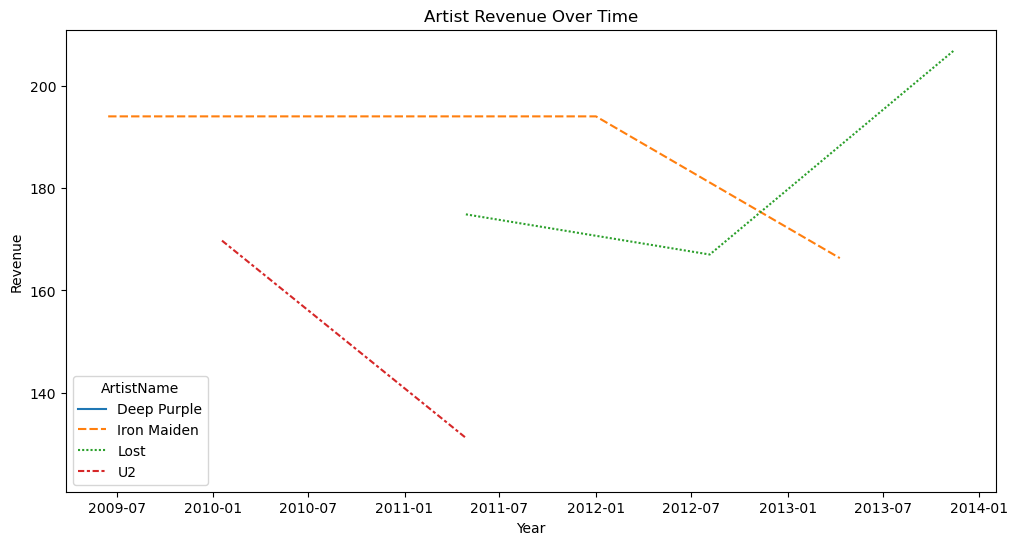

In [12]:
#visualizing Artist revenue over time
# Pivot the data for easier plotting
revenue_pivot = revenue_df.pivot(index='Year', columns='ArtistName', values='Revenue')


plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_pivot)
plt.title('Artist Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()


#### Key Insights:

    --Lost and U2: These artists exhibit more dramatic revenue changes. Lost experiences a decline in revenue over time, while U2 shows a notable increase, particularly in the later years. This could be attributed to factors such as new album releases, successful tours, or changes in market trends.

    --Revenue Fluctuations: There's significant variation in revenue for all artists over time, indicating fluctuations in popularity, album releases, or other factors influencing sales.


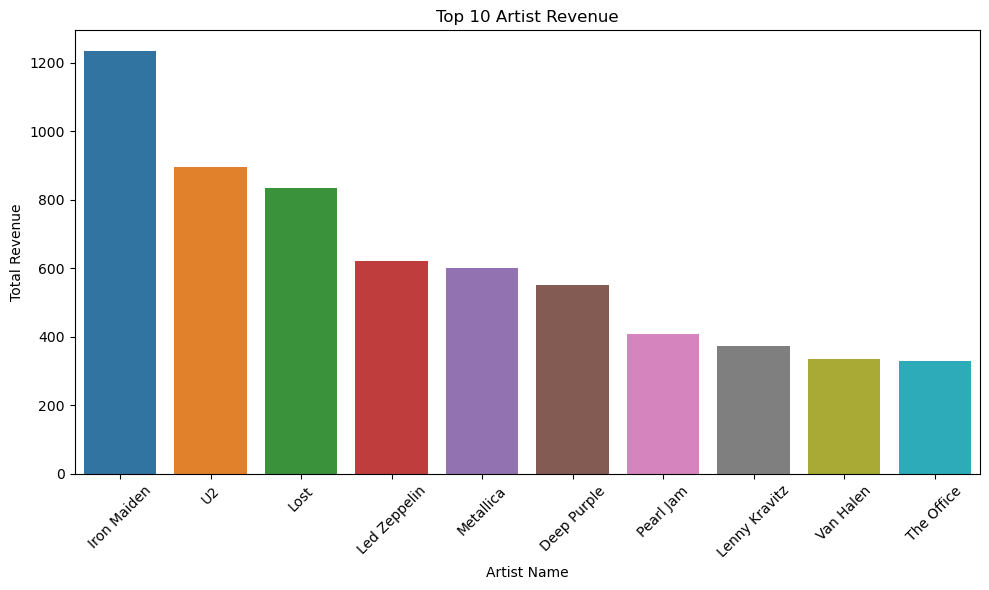

In [15]:
#Visualizing the top selling artist
top_10_df = YearlyRevenue_df.sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Revenue', data=top_10_df)
plt.title('Top 10 Artist Revenue')
plt.xlabel('Artist Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Key insights    
    --Dominant Artists: Iron Maiden and U2 significantly outpace the other artists in terms of revenue generation.
    
    --Revenue Disparity: There's a substantial gap in revenue between the top two artists and the rest of the list.
    
    --Revenue Tiers: The artists can be categorized into tiers based on revenue:
        --Top Tier: Iron Maiden, U2
        --Mid-Tier: Led Zeppelin, Metallica, Deep Purple
        --Lower Tier: Pearl Jam, Lenny Kravitz, Van Halen, The Office

In [ ]:
chinook_df.to_csv('chinook_df.csv', index = True)

In [ ]:
revenue_df = chinook_df.groupby(['ArtistName']).agg({'Total': 'sum'}).reset_index()
revenue_df['Revenue'] = revenue_df['Total'].round(2)

# Sort by Revenue and display the top 10
revenue_df = revenue_df.sort_values(by='Revenue', ascending=False).head(10)
print(revenue_df)


In [ ]:
revenue_df.to_csv('revenue_df.csv', index = True)

In [ ]:
YearlyRevenue_df.to_csv('YearlyRevenue_df.csv', index= True)

### prompt 2:

#### Customer Purchase Patterns: 
Segment customers based on purchase behavior and identify key characteristics of high-value customers.

To segment customers based on purchase behavior and identify key characteristics of high-value customers using the Chinook database, we can analyze customer purchase patterns by calculating total spending, number of purchases, and average purchase value. Then, we can identify key characteristics such as country, preferred genre, etc

#### The first step here is to create The customer_purchase_patterns (a temporary table) which calculates the total number of purchases (TotalPurchases), total amount spent (TotalSpent), and the average purchase value (AveragePurchaseValue) for each customer. This provides a summary of purchase behavior.

In [ ]:
# Connect to SQLite database
conn = sqlite3.connect('chinook1.db')

#Create a temporary table for customer purchase patterns
query_customer_purchase_patterns = """
CREATE TEMPORARY TABLE customer_purchase_patterns AS
SELECT 
    c.CustomerId,
    c.FirstName || ' ' || c.LastName AS CustomerName,
    c.Country,
    COUNT(i.InvoiceId) AS TotalPurchases,
    ROUND(SUM(i.Total), 2) AS TotalSpent,
    ROUND(AVG(i.Total), 2) AS AveragePurchaseValue
FROM customers c
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName, c.Country;
"""

# Execute the query to create the temporary table
conn.execute(query_customer_purchase_patterns)

#### Identify Preferred Genre:

#### The customer_genre_preferences identifies each customer's preferred genre by counting the number of purchases per genre and selecting the genre with the maximum purchases for each customer.

In [ ]:
#Create a temporary table for customer genre purchases
query_customer_genre_purchases = """
CREATE TEMPORARY TABLE customer_genre_purchases AS
SELECT
    c.CustomerId,
    g.Name AS Genre,
    COUNT(i.InvoiceId) AS GenrePurchases
FROM customers c
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
LEFT JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
LEFT JOIN tracks t ON ii.TrackId = t.TrackId
LEFT JOIN genres g ON t.GenreId = g.GenreId
GROUP BY c.CustomerId, g.Name;
"""

# Execute the query to create the temporary table
conn.execute(query_customer_genre_purchases)

In [ ]:
#Create a temporary table to identify the preferred genre for each customer
query_customer_genre_preferences = """
CREATE TEMPORARY TABLE customer_genre_preferences AS
SELECT
    CustomerId,
    Genre
FROM (
    SELECT
        CustomerId,
        Genre,
        GenrePurchases,
        ROW_NUMBER() OVER (PARTITION BY CustomerId ORDER BY GenrePurchases DESC) AS rn
    FROM customer_genre_purchases
)
WHERE rn = 1;
"""

# Execute the query to create the temporary table
conn.execute(query_customer_genre_preferences)


#### Combine Data and Order by Total Spent:

#### The final SELECT combines the purchase patterns and preferred genre information for each customer. The results are ordered by total amount spent (TotalSpent) in descending order to highlight high-value customers. Key Characteristics of High-Value Customers Customer Name: Full name of the customer. Country: Country of the customer. Total Purchases: Total number of purchases made by the customer. Total Spent: Total amount spent by the customer. Average Purchase Value: Average value of each purchase made by the customer. Preferred Genre: The genre with the highest number of purchases by the customer.

In [ ]:
#Combine the results from customer purchase patterns and the preferred genres
query_combined_results = """
SELECT
    cpp.CustomerName,
    cpp.Country,
    cpp.TotalPurchases,
    cpp.TotalSpent,
    cpp.AveragePurchaseValue,
    cgp.Genre AS PreferredGenre
FROM customer_purchase_patterns cpp
LEFT JOIN customer_genre_preferences cgp ON cpp.CustomerId = cgp.CustomerId
ORDER BY cpp.TotalSpent DESC;
"""


cpp_df = pd.read_sql_query(query_combined_results, conn)

conn.close()

# Display the DataFrame
print(cpp_df)


In [ ]:
print(cpp_df.columns)


In [ ]:
pd.to_csv('cpp_df.csv', index= True)

In [ ]:


# Visualization 1: Total Purchases by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPurchases', y='Country', data=df, palette='viridis')
plt.title('Total Purchases by Country')
plt.xlabel('Total Purchases')
plt.ylabel('Country')
plt.show()




In [ ]:
top_customers = df.nlargest(10, 'TotalSpent')
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSpent', y='CustomerName', data=top_customers, palette='magma')
plt.title('Top 10 Customers by Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.show()


Key Insights:

Significant Spending Disparity: The chart clearly shows a significant difference in spending between the top-ranking customers and the others. Helena Holý, the top spender, has a considerable lead over the rest.

Spending Clusters: There might be potential for customer segmentation based on spending levels. Customers can be grouped into high, medium, and low spenders.

Customer Loyalty: The top spenders might represent loyal customers with a strong affinity for the brand or products.
Potential for Targeted Marketing: Customers with higher spending might be ideal targets for loyalty programs, exclusive offers, or personalized marketing campaigns.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PreferredGenre', y='AveragePurchaseValue', data=df, palette='coolwarm')
plt.title('Average Purchase Value by Preferred Genre')
plt.xlabel('Preferred Genre')
plt.ylabel('Average Purchase Value')
plt.show()

Observation:

Rock Dominance:
The Rock genre exhibits the highest median average purchase value, indicating that customers who prefer Rock tend to spend more per purchase on average.
The box for Rock is also the tallest, suggesting a wider range of purchase values within this genre.
Metal and Latin Similarities:

Both Metal and Latin genres show similar median average purchase values, which are lower than Rock.
The box for Metal is slightly shorter than Rock, implying a smaller range of purchase values.
Latin has the shortest box, indicating a more concentrated range of average purchase values.

Alternative & Punk:
This genre has the lowest median average purchase value among the four.
The box is very short, suggesting a narrow range of purchase values.
There are outliers present, indicating a few customers with exceptionally high average purchase values within this genre.

Potential Implications
Pricing Strategy: The data suggests that the Rock genre might be positioned as a premium offering, given the higher average purchase value.

Customer Segmentation: Customers with a preference for Rock might represent a valuable segment for targeted marketing and product offerings.

Genre-Specific Promotions: Tailored promotions based on genre preferences could be effective in increasing average purchase value for Metal, Latin, and Alternative & Punk genres.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalSpent'], kde=True, color='blue')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

Observation:

The distribution of total spent is right-skewed. This means that a majority of the data points are concentrated on the left side of the graph, with a tail extending to the right.
The distribution appears to be unimodal, indicating a single peak in the data around the value of 37.
Potential Implications:

Majority of Customers: The majority of customers have a total spent value between 36 and 40.

Outliers: The presence of the right-skewed tail suggests the existence of a few customers with significantly higher total spent values compared to the majority. These customers might be considered high-value customers or outliers.

Potential for Segmentation: The distribution suggests potential for customer segmentation based on spending habits. Customers can be categorized into high, medium, and low spenders.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPurchases', y='TotalSpent', hue='PreferredGenre', data=df, palette='Spectral')
plt.title('Total Purchases vs. Total Spent')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spent')
plt.legend(title='Preferred Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations:

Consistent Purchase Frequency: All customers except one have made 7 purchases. This might indicate a specific business model or data limitations

In [ ]:
# Plot: Average Purchase Value by Preferred Genre
plt.figure(figsize=(14, 8))
sns.barplot(x='AveragePurchaseValue', y='PreferredGenre', data=df, errorbar=None, palette='plasma')
plt.title('Average Purchase Value by Preferred Genre')
plt.xlabel('Average Purchase Value ($)')
plt.ylabel('Preferred Genre')
plt.show()

#### Observation:

The chart illustrates the average purchase value across different music genres. The length of each bar represents the average spending amount for customers who prefer that particular genre.

#### Key Insights:

Rock Dominance: Customers who prefer Rock music tend to have the highest average purchase value.

Genre-Based Spending Patterns: The chart clearly shows distinct spending patterns across different genres. Metal follows Rock in terms of average purchase value, while Latin and Alternative & Punk genres exhibit lower average spending.

.

## Genre Popularity:
Determine the most popular music genres and analyze the change in genre popularity over different time periods

In [ ]:
#we explore the genre table on the chinook db. We join the invoice, tracks and the genre table for analysis
conn = sqlite3.connect('chinook1.db')


query = """

SELECT
    g.Name AS Genre,
    STRFTIME('%Y', i.InvoiceDate) AS Year,
    COUNT(ii.InvoiceId) AS GenrePurchases
FROM invoices i
LEFT JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
LEFT JOIN tracks t ON ii.TrackId = t.TrackId
LEFT JOIN genres g ON t.GenreId = g.GenreId
GROUP BY g.Name, Year
ORDER BY Year, GenrePurchases DESC;
"""

genrePopularity_df = pd.read_sql_query(query, conn)


conn.close()

print(genrePopularity_df)


In [ ]:
def visualize_genre_popularity(genrePopularity_df):
    """Visualizes genre popularity over time for specified years.

    Args:
        genrePopularity_df: DataFrame containing genre, year, and genre purchases data.
    """

    # Filter data for years 2009-2013
    genrePopularity_filtered = genrePopularity_df[genrePopularity_df['Year'].isin(['2009', '2010', '2011', '2012', '2013'])]

    # Create subplots for each year
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 22))
    plt.subplots_adjust(hspace=0.5)

    for i, year in enumerate(['2009', '2010', '2011', '2012', '2013']):
        year_data = genrePopularity_filtered[genrePopularity_filtered['Year'] == year]
        sns.barplot(x='Genre', y='GenrePurchases', data=year_data, ax=axes[i])
        axes[i].set_title(f'Genre Popularity in {year}')
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")


    plt.show()


visualize_genre_popularity(genrePopularity_df)

Overall Trend:

Rock Dominance: Rock consistently holds a strong position as the most popular genre throughout the years 2009 to 2013.

Genre Fluctuation: There's a noticeable fluctuation in the popularity of other genres over time. Some genres experience periods of growth, while others decline.

Emergence of Alternative & Punk: There's a visible increase in the popularity of Alternative & Punk genres, particularly in the later years.

Declining Traditional Genres: Genres like Blues, Jazz, and Classical seem to be declining in popularity.
Rising Electronic Music: Electronic genres (Electronic/Dance, Hip Hop/Rap) show increasing popularity, especially in later years.

The chart demonstrates a wide range of music preferences among listeners.

Potential Implications:

Market Targeting: Record labels and music platforms could focus on promoting Alternative & Punk and Electronic genres.
Content Creation: Music producers and artists might consider catering to the growing demand for these genres.




## Sales Over Time: 
Analyze monthly and yearly sales trends.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('chinook1.db')

# SQL Query directly from the database
query = """
SELECT
  InvoiceDate,
  ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
GROUP BY InvoiceDate
ORDER BY InvoiceDate;
"""


invoice_df = pd.read_sql_query(query, conn)
conn.close()

# Convert InvoiceDate to datetime
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

# Extract Year and Month
invoice_df['YearMonth'] = invoice_df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and reset index
monthly_sales = invoice_df.groupby('YearMonth')['MonthlySales'].sum().reset_index()

# Display the results
print(monthly_sales)


In [ ]:
# function to caculate our sales over time

def calculate_sales_over_time(df):
  
    # Create a new column for YearMonth based on InvoiceDate
    df['YearMonth_Sales'] = df['InvoiceDate'].dt.to_period('M')

    # Group by YearMonth and sum the Total column
    sales_over_time = df.groupby('YearMonth_Sales')['Total'].sum().reset_index()

    # Rename columns for clarity
    sales_over_time.columns = ['YearMonth', 'TotalSales']

    return sales_over_time

# Example usage
sales_over_time_df = calculate_sales_over_time(chinook_df)
sales_over_time_df 

Due to the disparity in report, we will stick with data from the sqlite query, as this directly analyses the invoice table from the chinnok db.
The python code has overly complex join which could lead to other data inconsistencies.
its safe to stick with the sql query.

 ## Analyze sales trends 2009

In [ ]:
conn = sqlite3.connect('chinook1.db')


query = """

SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
WHERE STRFTIME('%Y', InvoiceDate) = '2009'
GROUP BY YearMonth
ORDER BY YearMonth;

"""

df = pd.read_sql_query(query, conn)
conn.close()


print(df)


In [ ]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'])


plt.figure(figsize=(10, 6))
plt.plot(df['YearMonth'], df['MonthlySales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales in 2009')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.show()

### Sales Trends:

#### Fluctuations in 2009:
- The monthly sales for 2009 are quite consistent, ranging from 35.64 to 37.62.
- There is no noticeable seasonal pattern in 2009 as the sales are relatively stable.



 ## Analyze sales trends 2010

In [ ]:
conn = sqlite3.connect('chinook1.db')


query2010 = """

SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
WHERE STRFTIME('%Y', InvoiceDate) = '2010'
GROUP BY YearMonth
ORDER BY YearMonth;

"""

monthly2010_df = pd.read_sql_query(query2010, conn)

conn.close()


print(monthly2010_df)


In [ ]:

# Convert YearMonth to datetime for plotting
monthly2010_df['YearMonth'] = pd.to_datetime(monthly2010_df['YearMonth'])

plt.figure(figsize=(10, 6))
plt.plot(monthly2010_df['YearMonth'], monthly2010_df['MonthlySales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales in 2010')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.show()


#### Increase in Early 2010:
- In January 2010, there is a significant increase in sales to 52.62.
- Sales decrease slightly in:
  - February 46.62
  - March 44.62
- Then stabilize around 37.62 for the rest of the year.
- This could indicate a potential seasonal trend where the beginning of the year sees a spike in sales.



 ## Analyze sales trends 2011

In [ ]:
conn = sqlite3.connect('chinook1.db')

query2011 = """

SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
WHERE STRFTIME('%Y', InvoiceDate) = '2011'
GROUP BY YearMonth
ORDER BY YearMonth;

"""

month2011_df = pd.read_sql_query(query2011, conn)


conn.close()

print(month2011_df)


In [ ]:
# Convert YearMonth to datetime for plotting
month2011_df['YearMonth'] = pd.to_datetime(month2011_df['YearMonth'])

plt.figure(figsize=(10, 6))
plt.plot(month2011_df['YearMonth'], month2011_df['MonthlySales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales in 2011')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.show()

##### Fluctuations in 2011:

- January to March 2011 shows consistent sales of 37.62.
- There are spikes in:
  - April 51.62
  - May 42.62
  - June 50.62
- There is a drop to 23.76 in November.
- This indicates potential seasonal sales or promotional events affecting sales in April, May, and June.


 ## Analyze sales trends 2012

In [ ]:
conn = sqlite3.connect('chinook1.db')


query2012 = """

SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
WHERE STRFTIME('%Y', InvoiceDate) = '2012'
GROUP BY YearMonth
ORDER BY YearMonth;

"""
monthly2012_df = pd.read_sql_query(query2012, conn)


conn.close()


print(monthly2012_df)


In [ ]:
# Convert YearMonth to datetime for plotting
monthly2012_df['YearMonth'] = pd.to_datetime(monthly2012_df['YearMonth'])

plt.figure(figsize=(10, 6))
plt.plot(monthly2012_df['YearMonth'], monthly2012_df['MonthlySales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales in 2012')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.show()


#### Increase in Mid-2012:
- Sales are steady from January to July 2012, ranging from 37.62 to 39.62.
- There is a significant increase in:
  - August 47.62
  - September 46.71
- This might indicate seasonal effects or special events leading to higher sales in the middle of the year.



 ## Analyze sales trends 2013

In [ ]:
conn = sqlite3.connect('chinook1.db')

query2013 = """

SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS MonthlySales
FROM invoices
WHERE STRFTIME('%Y', InvoiceDate) = '2013'
GROUP BY YearMonth
ORDER BY YearMonth;

"""

month2013_df = pd.read_sql_query(query2013, conn)


conn.close()


print(month2013_df)


In [ ]:
# Convert YearMonth to datetime for plotting
month2013_df['YearMonth'] = pd.to_datetime(month2013_df['YearMonth'])

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(month2013_df['YearMonth'], month2013_df['MonthlySales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales in 2013')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.show()


#### Fluctuations in 2013:
- There is a noticeable dip in:
  - February 2013, 27.72
  - April 2013, 33.66
- November 2013 shows a significant increase to 49.62, which might indicate a seasonal peak, possibly due to holiday sales.
- December 2013 has a slight increase to 38.62, consistent with the end-of-year sales trend.

## Sales trend by the Year

In [ ]:
#we aggregate the sales by year to get a comprehensive yealy sales
conn = sqlite3.connect('chinook1.db')

year_query = """

SELECT
    STRFTIME('%Y', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS YearlySales
FROM invoices
GROUP BY YearMonth
ORDER BY YearMonth;
"""

sales_df = pd.read_sql_query(year_query, conn)

conn.close()

print(sales_df)



In [ ]:
#visualise the data
data = {'2009': 449.46, '2010': 481.45, '2011': 469.58, '2012': 477.53, '2013': 450.58}

plt.bar(data.keys(), data.values(), width=0.8)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
# Add gridlines
plt.grid(axis='y')

plt.show()

### Yearly Sales Trends:

#### 2009:
- **Total sales for the year:** 449.46
- Sales were relatively consistent throughout the year.

#### 2010:
- **Total sales for the year:** 481.45
- Notable increase in sales compared to 2009.
- Indicates an upward trend, potentially due to increased customer base or successful promotions.

#### 2011:
- **Total sales for the year:** 469.58
- Slight decrease compared to 2010.
- Indicates some fluctuations but overall stable sales performance.

#### 2012:
- **Total sales for the year:** 477.53
- Increase in sales compared to 2011.
- Indicates recovery and growth in sales, potentially due to effective marketing or seasonal promotions.

#### 2013:
- **Total sales for the year:** 450.58
- Decrease in sales compared to 2012.
- Indicates a potential decline, suggesting the need for analyzing factors affecting sales drop. probably due to inconsistency in effective marketing and seasonal promotion 

### Summary:
- The yearly sales trend shows fluctuations with an overall peak in 2010.
- 2011 and 2013 show slight decreases, while 2012 shows recovery in sales.
-


### Customer Lifetime Value (CLV):
Calculate the lifetime value of customers based on their purchase history and provide recommendations for improving customer retention

In [ ]:
def calculate_clv(db_file, retention_rate=0.75):
    """Calculates Customer Lifetime Value (CLV) from a SQLite database.

    Args:
        retention_rate: The assumed customer retention rate.

    Returns:
        A Pandas DataFrame containing customer ID, total revenue, average purchase value,
        purchase frequency, calculated CLV, and additional customer demographics.
"""

    conn = sqlite3.connect(db_file)

    query = f"""
        WITH CustomerSpending AS (
            SELECT
                c.CustomerId,
                c.FirstName,
                c.LastName,
                c.Country,
                c.State,
                SUM(i.Total) AS TotalRevenue,
                AVG(i.Total) AS AvgPurchaseValue,
                COUNT(i.InvoiceId) AS PurchaseFrequency
            FROM customers c
            LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
            GROUP BY c.CustomerId
             ),
        CLV_Calculation AS (
            SELECT
                cs.CustomerId,
                cs.FirstName,
                cs.LastName,
                cs.Country,
                cs.State,
                cs.TotalRevenue,
                cs.AvgPurchaseValue,
                cs.PurchaseFrequency,
               (cs.AvgPurchaseValue * cs.PurchaseFrequency) / (1 - {retention_rate}) AS CLV
          FROM CustomerSpending cs
          )
          SELECT
              CustomerId,
              FirstName,
              LastName,
              Country,
              State,
              TotalRevenue,
              AvgPurchaseValue,
              PurchaseFrequency,
              CLV
          FROM CLV_Calculation
          ORDER BY CLV DESC;
        """

    df = pd.read_sql_query(query, conn)
    conn.close()

    return df


db_file = 'chinook1.db'
clv_df = calculate_clv(db_file, retention_rate=0.8)  # Adjust retention rate as needed
print(clv_df)


In [ ]:
clv_df

In [ ]:
import pandas as pd

def analyze_customer_distribution(clv_df):
    """Analyzes customer distribution by country and state.

    Args:
        clv_df: The DataFrame containing CLV data.

    Returns:
        Two DataFrames: one for country-wise customer counts and another for state-wise customer counts.
    """

    # Country-wise customer count
    country_counts = clv_df['Country'].value_counts().reset_index()
    country_counts.columns = ['Country', 'CustomerCount']

    # State-wise customer count (if available)
    state_counts = clv_df['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'CustomerCount']

    return country_counts, state_counts

# Example usage:
country_dist, state_dist = analyze_customer_distribution(clv_df)
print(country_dist)
print(state_dist)


In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(clv_df['CLV'], bins=20, edgecolor='black')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Lifetime Value')
plt.grid(axis='y')
plt.show()

#### Key Observations:
Right-skewed distribution: The majority of customers have a lower CLV, with a smaller number of customers contributing significantly higher values. This is indicated by the elongated tail on the right side of the histogram.

Concentration around lower CLV: The tallest bar is on the left side of the graph, suggesting a large portion of customers have a CLV within the lower range.

Outliers: There are some customers with exceptionally high CLV values, represented by the bars on the far right of the histogram. These customers contribute significantly to overall revenue.

#### Implications:
Focus on customer retention: Since a large portion of customers have lower CLV, efforts to improve customer retention and increase purchase frequency can be beneficial.

Identify high-value customers: The customers with exceptionally high CLV deserve special attention and tailored marketing strategies to maximize their value.

Customer segmentation: Dividing customers into segments based on CLV can help in targeted marketing and resource allocation.

In [ ]:
plt.figure(figsize=(10, 12))
sns.boxplot(x='Country', y='CLV', data=clv_df)
plt.title('CLV Distribution by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Czech Republic and USA:
These countries have a higher median CLV compared to other countries. Additionally, they have a wider range of CLV values, indicating greater variation in customer spending habits.

#### Lower CLV Countries: 
Countries like Brazil, Portugal, and Canada have lower median CLV values and a narrower range, suggesting a more homogenous customer base with lower spending.

#### Outliers:
While present in multiple countries, some countries like the USA and Czech Republic have more pronounced outliers, indicating the presence of high-value customers

#### Recommendation:

Market Segmentation: Focus on understanding the factors contributing to higher CLV in countries like Czech Republic and the USA to replicate success in other markets.

Customer Retention: Implement targeted retention strategies for countries with lower CLV to increase customer lifetime value.

Outlier Analysis: Identify and analyze the characteristics of high-value customers (outliers) to understand their behavior and preferences.

In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder



# Create a pivot table with InvoiceId as index and TrackId or AlbumId as columns
invoice_item_pivot = chinook_df.pivot_table(index='InvoiceId_Invoice', columns=['TrackId'], values='Quantity', fill_value=0)

# Convert the pivot table to a list of lists format required by mlxtend
transaction_data = invoice_item_pivot.astype(bool).astype(int).values.tolist()
